<p align="center"><img src="https://www.utem.edu.my/templates/yootheme/cache/03/LogoUTeM-03999b95.png" width="300"></p>



#About The Data

In the era of the so called 4th industrial revolution, the Factory of the Future and the Industrial Internet of Things, the industrial mechanical systems become continuously more intelligent and more complex. Therefore, there is a clear need for research and development on data driven methodologies and condition monitoring techniques which are able to achieve fast, reliable and high-quality diagnosis in an automatic manner

Rotating machines are widely used in manufacturing industry, operating usually for long time under harsh conditions. Sudden failures occurring on key machine components such as gears and bearings may lead to unexpected breakdown of machines and cause economic loss, environmental pollution and human casualties
Early and accurate detection of defects and failures of such components of rotating machinery is critical to ensure operational reliability and avoid catastrophic accidents in industrial applications
Here we use top view images of submersible pump impeller to find casting defects (you can you any mechanical device images as the dataset)

credits for the dataset : https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image 

# Feature scaling¶

The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc. However, it becomes difficult to apply custom transformations that are not available in Keras. In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset.




## flow_from_directory

Flow from directory create train and test data according to the following directory structure:

<p align="center"><img src="https://miro.medium.com/max/720/1*HpvpA9pBJXKxaPCl5tKnLg.webp" width="600"></p>



In [4]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


### Visualization of defective and non-defective gear

Example of a non-defective gear:

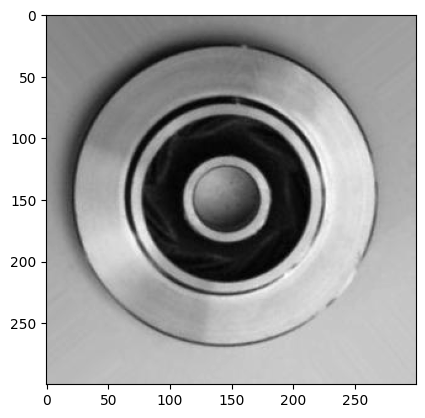

In [25]:
okey_img = image.load_img('casting_data/train/ok_front/cast_ok_0_1002.jpeg',color_mode='grayscale')
plt.imshow(okey_img,cmap='gray')
plt.show()

Example of a defective gear:

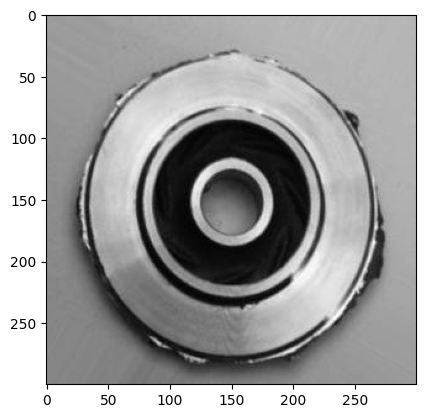

In [28]:
def_img = image.load_img('casting_data/train/def_front/cast_def_0_26.jpeg',color_mode='grayscale')
plt.imshow(def_img,cmap='gray')
plt.show()

## CNN Model

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, brain-computer interfaces, and financial time serie

steps involved

1 Convolution

2 Pooling

3 Flattening the image into 1D array

4 Fully Connected layer

In [17]:
def convolutional_model():
    model = tf.keras.models.Sequential()
    #convolution+pooling
    model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
    #second layer
    model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

    model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


    #creating nueral network 
    model.add(tf.keras.layers.Dense(units=128,activation='relu'))
    model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
    model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

    return model        

In [18]:
model = convolutional_model()

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the model

In [22]:
model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
830/830 [==============================] - 8s 9ms/step - loss: 0.3301 - accuracy: 0.8479 - val_loss: 0.3159 - val_accuracy: 0.8629
Epoch 2/10
830/830 [==============================] - 8s 9ms/step - loss: 0.2344 - accuracy: 0.9003 - val_loss: 0.2695 - val_accuracy: 0.8853
Epoch 3/10
830/830 [==============================] - 8s 9ms/step - loss: 0.1716 - accuracy: 0.9306 - val_loss: 0.2313 - val_accuracy: 0.9259
Epoch 4/10
830/830 [==============================] - 8s 9ms/step - loss: 0.1274 - accuracy: 0.9509 - val_loss: 0.2273 - val_accuracy: 0.9245
Epoch 5/10
830/830 [==============================] - 8s 10ms/step - loss: 0.1231 - accuracy: 0.9546 - val_loss: 0.1665 - val_accuracy: 0.9399
Epoch 6/10
830/830 [==============================] - 8s 9ms/step - loss: 0.1337 - accuracy: 0.9512 - val_loss: 0.2473 - val_accuracy: 0.9259
Epoch 7/10
830/830 [==============================] - 8s 9ms/step - loss: 0.0929 - accuracy: 0.9664 - val_loss: 0.3964 - val_accuracy: 0.8895
Epoch

### Prediction

Make a prediction a sample test image

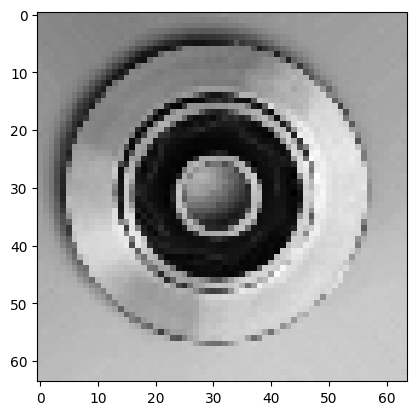

In [14]:
test_image_unproc = image.load_img('casting_data/test/ok_front/cast_ok_0_1002.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.load_img('casting_data/test/ok_front/cast_ok_0_1002.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
plt.imshow(test_image_unproc,cmap='gray')
plt.show()


In [15]:
result = model.predict(test_image)
print(result)
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

1/1 [==============================] - 0s 22ms/step
[[0.9910829]]
Not Defective
